In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py


In [2]:
import os 
os.getcwd() 

'D:\\code\\Fiona\\climate project\\New Data'

# average reflectance to 500m 

In [1]:
import numpy as np
import h5py

In [8]:
fname1= "profiles/profile_00001.hdf5"
hf = h5py.File(fname1, 'r')
r=hf.get('reflectance')

In [9]:
r.shape

(12, 6, 4096)

In [2]:
r_data = np.empty((4000,4096,6,12), dtype=float) # entire reflectance dataset
cot_data=np.empty((4000,4096),dtype=float) #entire cot dataset
for i in range(0,4000):#4000
    for a in range(6):#6
        for b in range(12):#12
            fname = "profiles/profile_%05d.hdf5"%(i+1)
            hf = h5py.File(fname, 'r')
            r_data[i,:,a,b] = np.array(hf.get("reflectance"))[b,a,:]
            cot=np.array(hf.get('tau'))
            cot_data[i,:]=cot
            hf.close()

In [3]:
r_data.shape

(4000, 4096, 6, 12)

In [4]:
#use standard agnles: sza=60 vza=0
r=r_data[:,:,5,5]

In [5]:
r.shape

(4000, 4096)

In [18]:
cot_data.shape

(4000, 4096)

In [6]:
# current resolution: 10m =0.01km
    
# new resolution: 500m=0.5km

# SO, average every 50 reflectance values across the 4096 reflectance values
#And, average every 50 cot values across the 4096 cot values 


#4096/50=81.92, round to 82, in each profile

In [7]:
r_500m=np.empty((4000,82), dtype=float)

for i in range(4000):
    for j in range(82):#4096/500=81.92, round to 82
        if (j+1)*50<4096:
            r_500m[i][j]=np.mean(r[i][j*50:(j+1)*50])
        else:
            r_500m[i][j]=np.mean(r[i][j*50:])


In [8]:
r_500m.shape

(4000, 82)

In [20]:
cot_500m=np.empty((4000,82), dtype=float)

In [21]:
for i in range(4000):
    for j in range(82):#4096/500=81.92, round to 82
        if (j+1)*50<4096:
            cot_500m[i][j]=np.mean(cot_data[i][j*50:(j+1)*50])
        else:
            cot_500m[i][j]=np.mean(cot_data[i][j*50:])


In [22]:
cot_500m.shape

(4000, 82)

Text(0.5, 1.0, 'Average reflectance to 500m across 4096 reflectance values in Dataset v1')

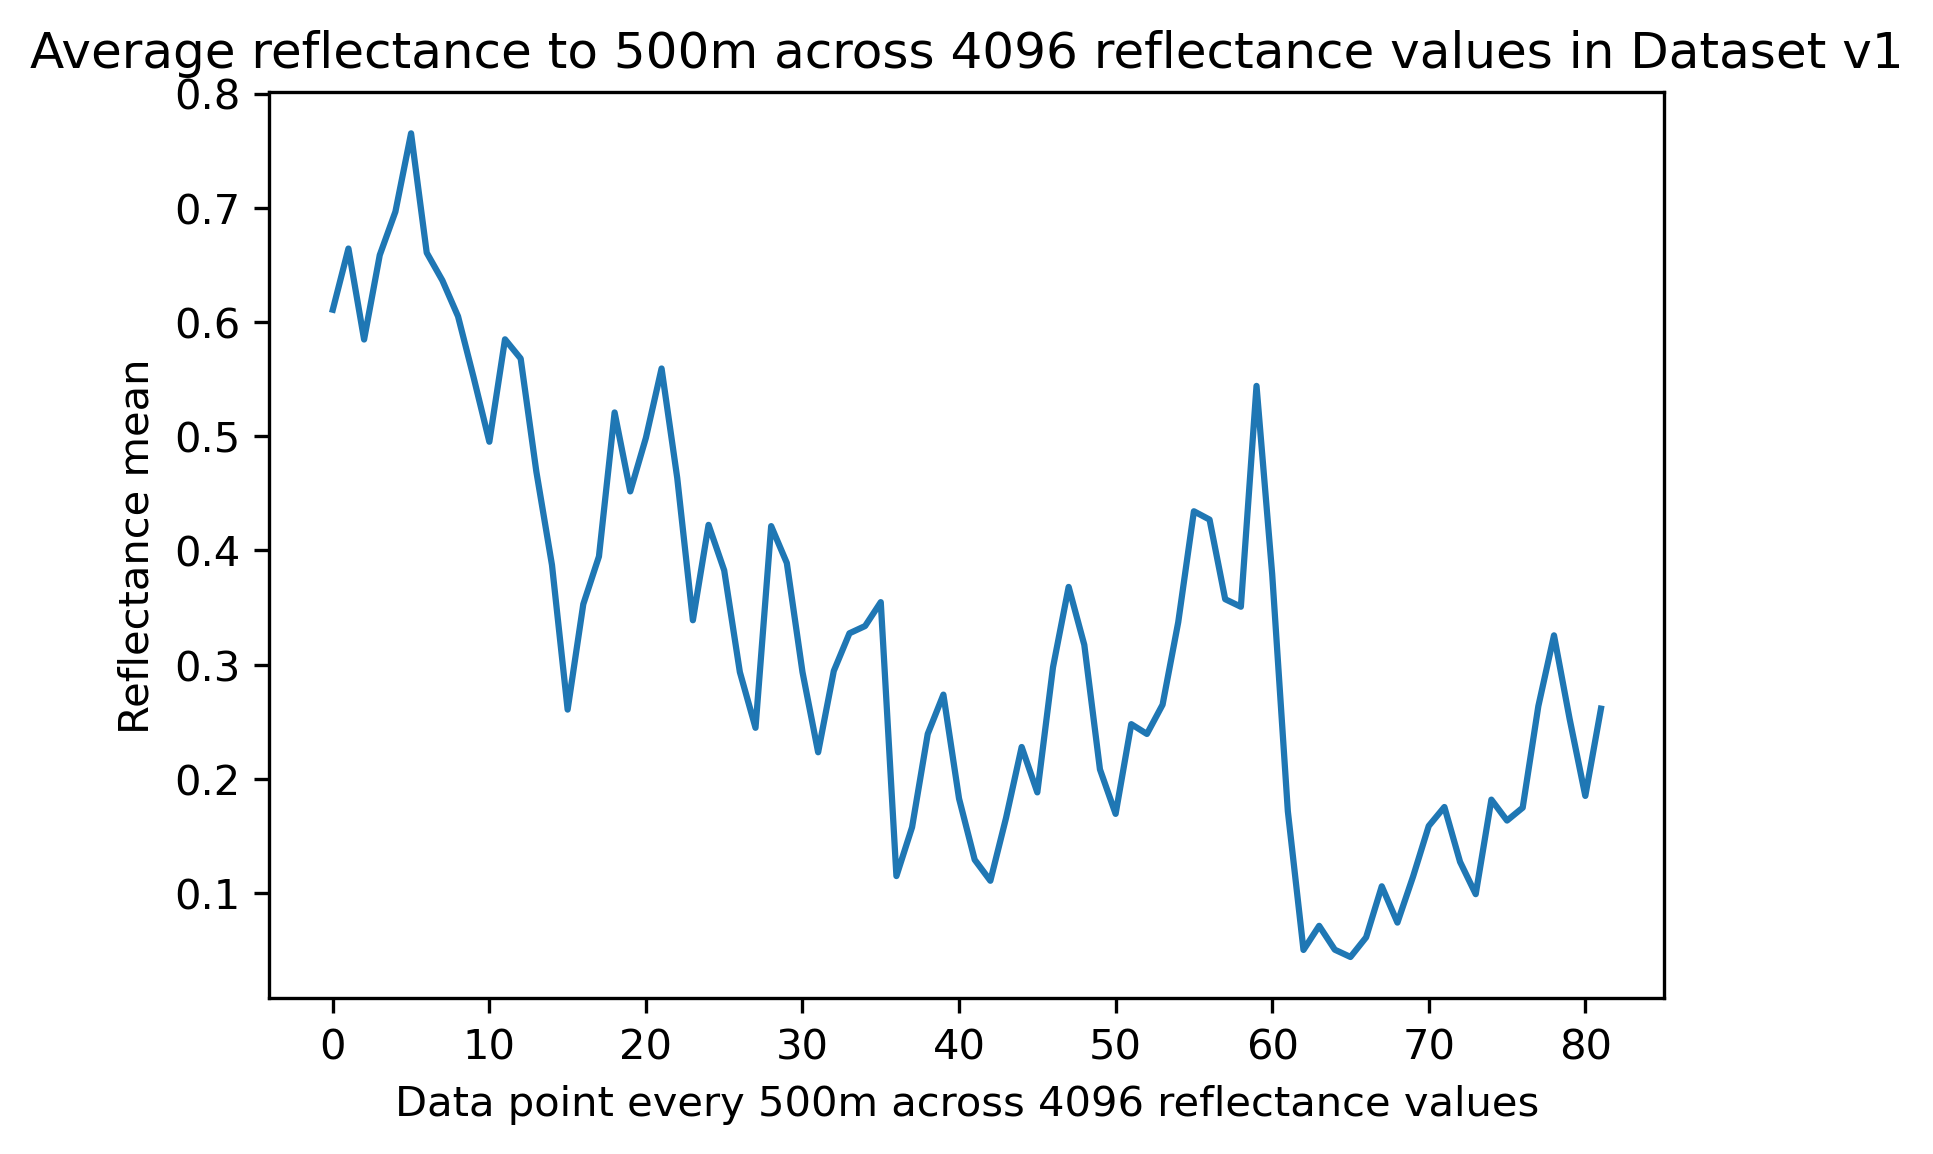

In [24]:
import matplotlib.pyplot as plt
# plotting the profile_00001
fig,ax=plt.subplots(dpi=300)
ax.plot(range(82),r_500m[0])
#ax.plot(range(82),cot_500m[0])

ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Data point every 500m across 4096 reflectance values')
plt.title('Average reflectance to 500m across 4096 reflectance values in Dataset v1')

Text(0.5, 1.0, 'Average reflectance to 500m across 4096 reflectance values in Dataset v1')

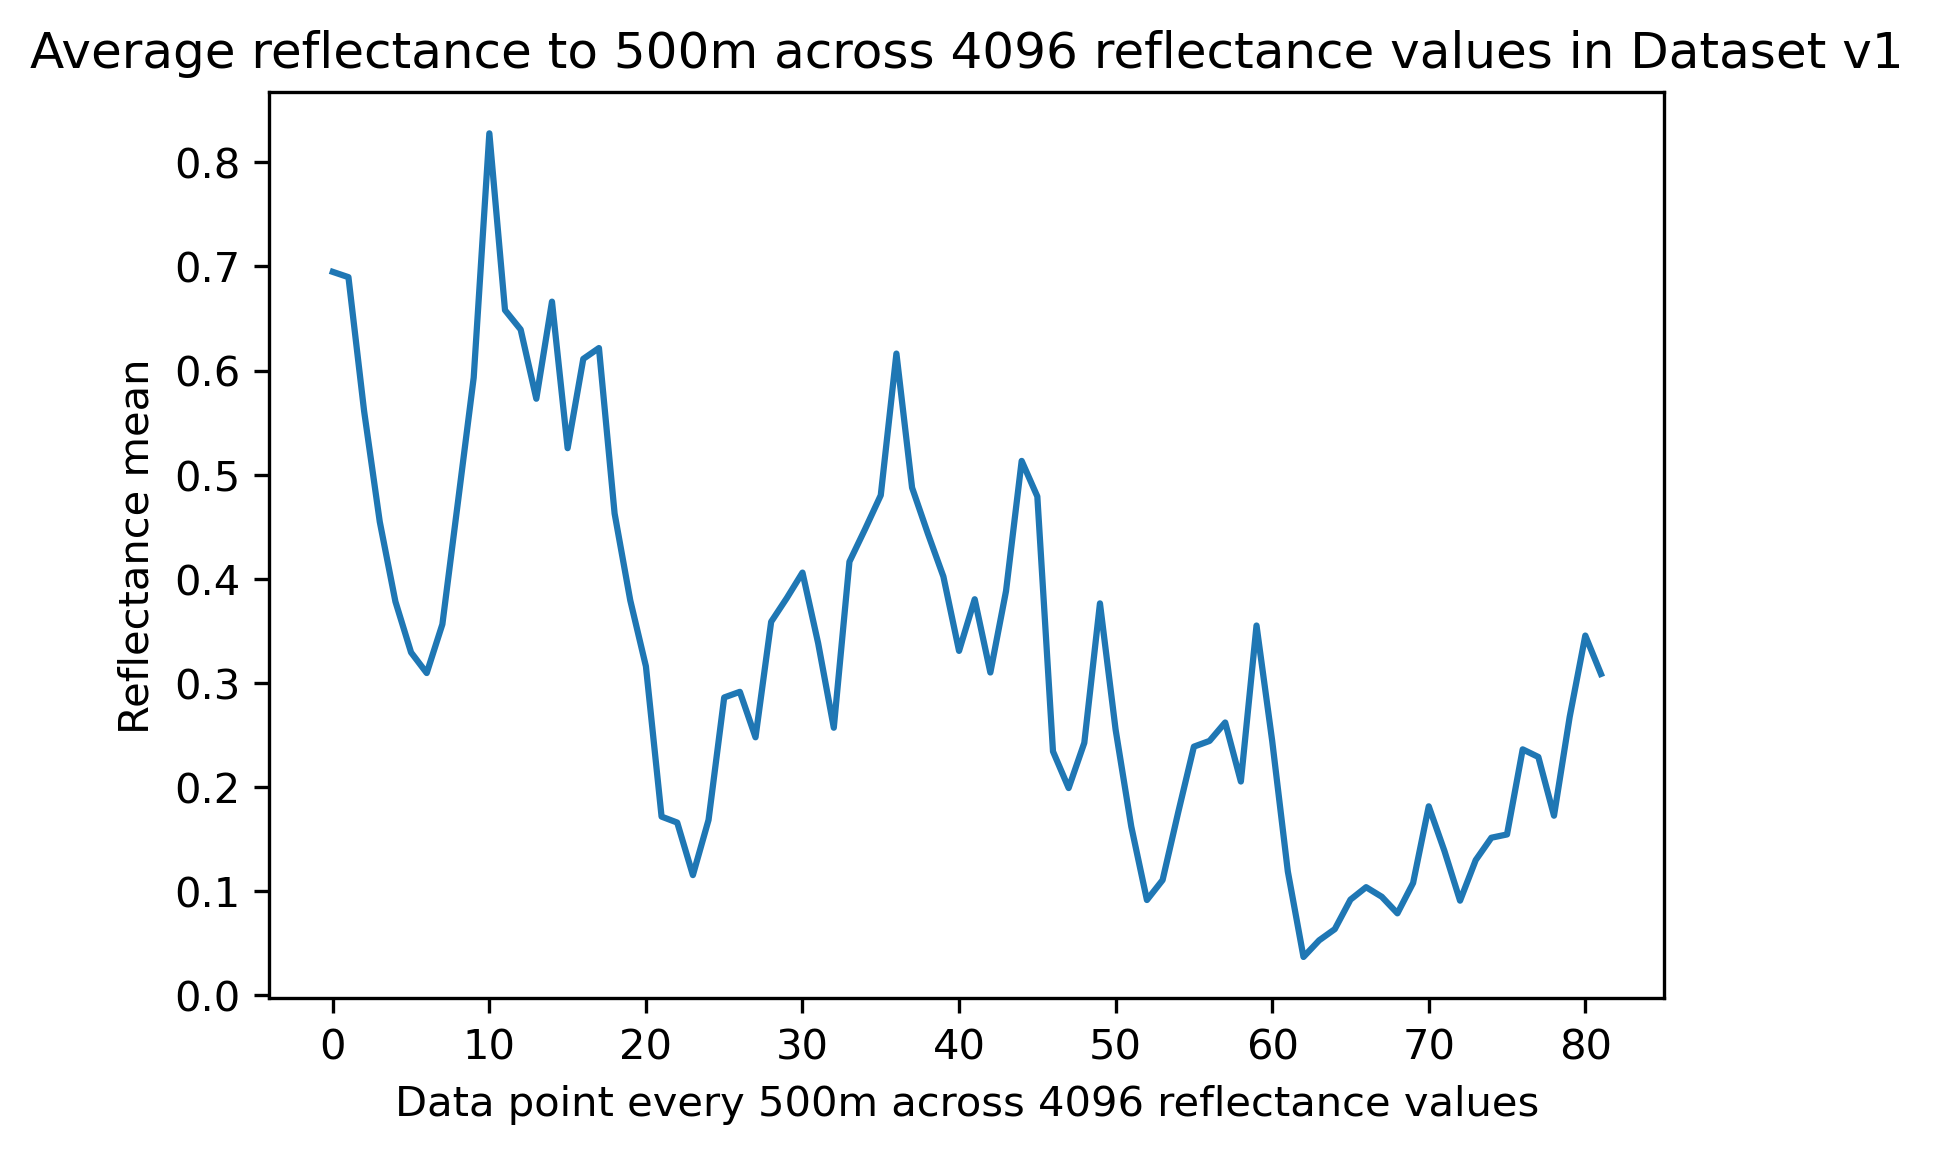

In [11]:
# plotting the profile_00002
fig,ax=plt.subplots(dpi=300)
ax.plot(range(82),r_500m[2])
ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Data point every 500m across 4096 reflectance values')
plt.title('Average reflectance to 500m across 4096 reflectance values in Dataset v1')

# saving to hdf5 file

In [12]:
hf = h5py.File('data_reflectance.h5', 'w')


In [13]:
hf.create_dataset('dataset_reflectance', data=r_500m)


<HDF5 dataset "dataset_reflectance": shape (4000, 82), type "<f8">

In [14]:
hf.close()


In [15]:
hf = h5py.File('data_reflectance.h5', 'r')


In [16]:
n1 = hf.get('dataset_reflectance')
n1

<HDF5 dataset "dataset_reflectance": shape (4000, 82), type "<f8">

In [25]:
hf = h5py.File('data_cot.h5', 'w')


In [26]:
hf.create_dataset('dataset_cot', data=cot_500m)


<HDF5 dataset "dataset_cot": shape (4000, 82), type "<f8">

In [27]:
hf.close()


In [28]:
hf = h5py.File('data_cot.h5', 'r')
n1 = hf.get('dataset_cot')
n1

<HDF5 dataset "dataset_cot": shape (4000, 82), type "<f8">

# average reflectance to 1km

In [ ]:
# current resolution: 10m =0.01km
    
# new resolution: 1000m=1km

# SO, average every 100 reflectance values across the 4096 reflectance values
#And, average every 100 cot values across the 4096 cot values 


#4096/100=41.96, round to 42, in each profile

In [37]:
r_1000m=np.empty((4000,42), dtype=float)

for i in range(4000):
    for j in range(42):#4096/500=81.92, round to 82
        if (j+1)*100<4096:
            r_1000m[i][j]=np.mean(r[i][j*100:(j+1)*100])
        else:
            r_1000m[i][j]=np.mean(r[i][j*100:])

In [38]:
r_1000m.shape

(4000, 42)

In [39]:
cot_1000m=np.empty((4000,42), dtype=float)

In [40]:
for i in range(4000):
    for j in range(42):#4096/1000=41.96, round to 42
        if (j+1)*100<4096:
            cot_1000m[i][j]=np.mean(cot_data[i][j*100:(j+1)*100])
        else:
            cot_1000m[i][j]=np.mean(cot_data[i][j*100:])


Text(0.5, 1.0, 'Average reflectance to 1km across 4096 reflectance values in Dataset v1')

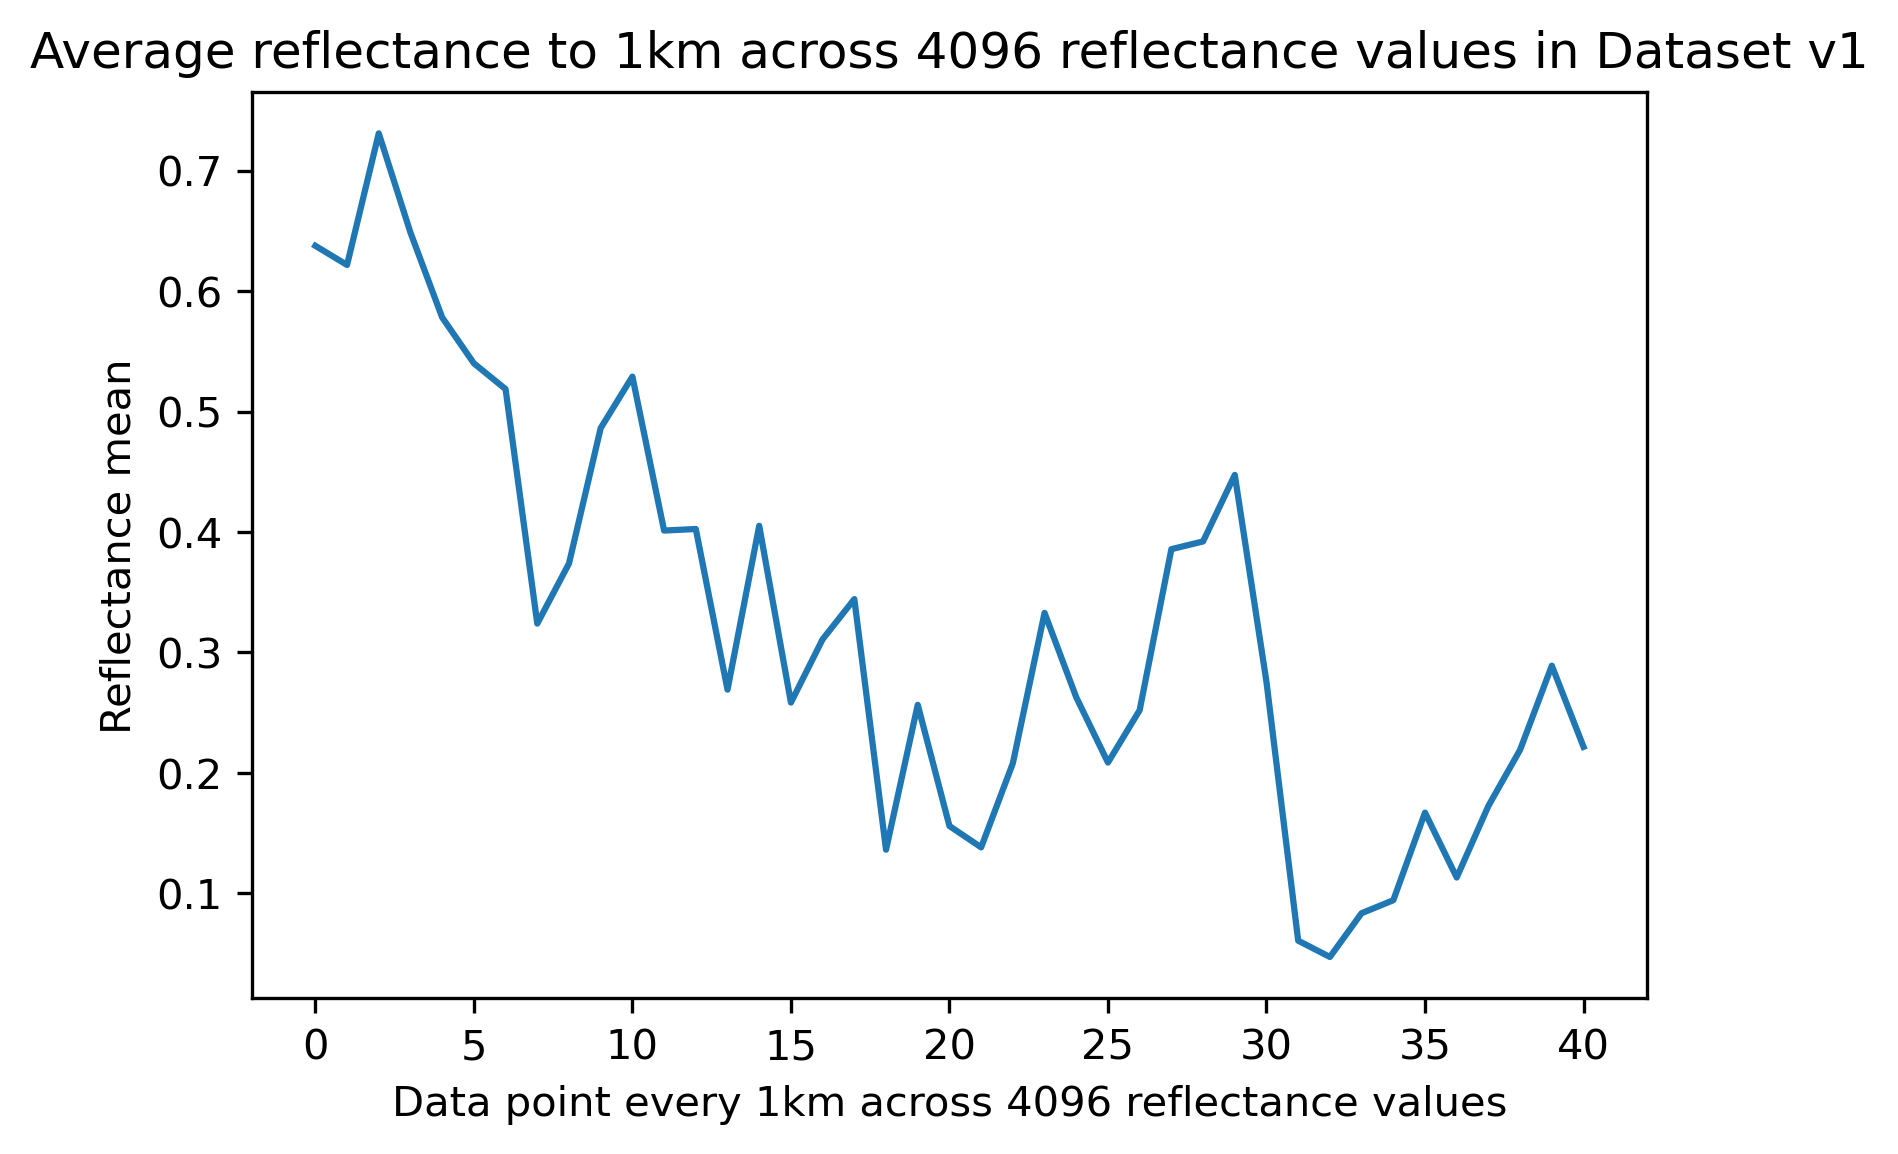

In [42]:
import matplotlib.pyplot as plt
# plotting the profile_00001
fig,ax=plt.subplots(dpi=300)
ax.plot(range(42),r_1000m[0])
#ax.plot(range(42),cot_500m[0])

ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Data point every 1km across 4096 reflectance values')
plt.title('Average reflectance to 1km across 4096 reflectance values in Dataset v1')

Text(0.5, 1.0, 'Average reflectance to 1000m across 4096 reflectance values in Dataset v1')

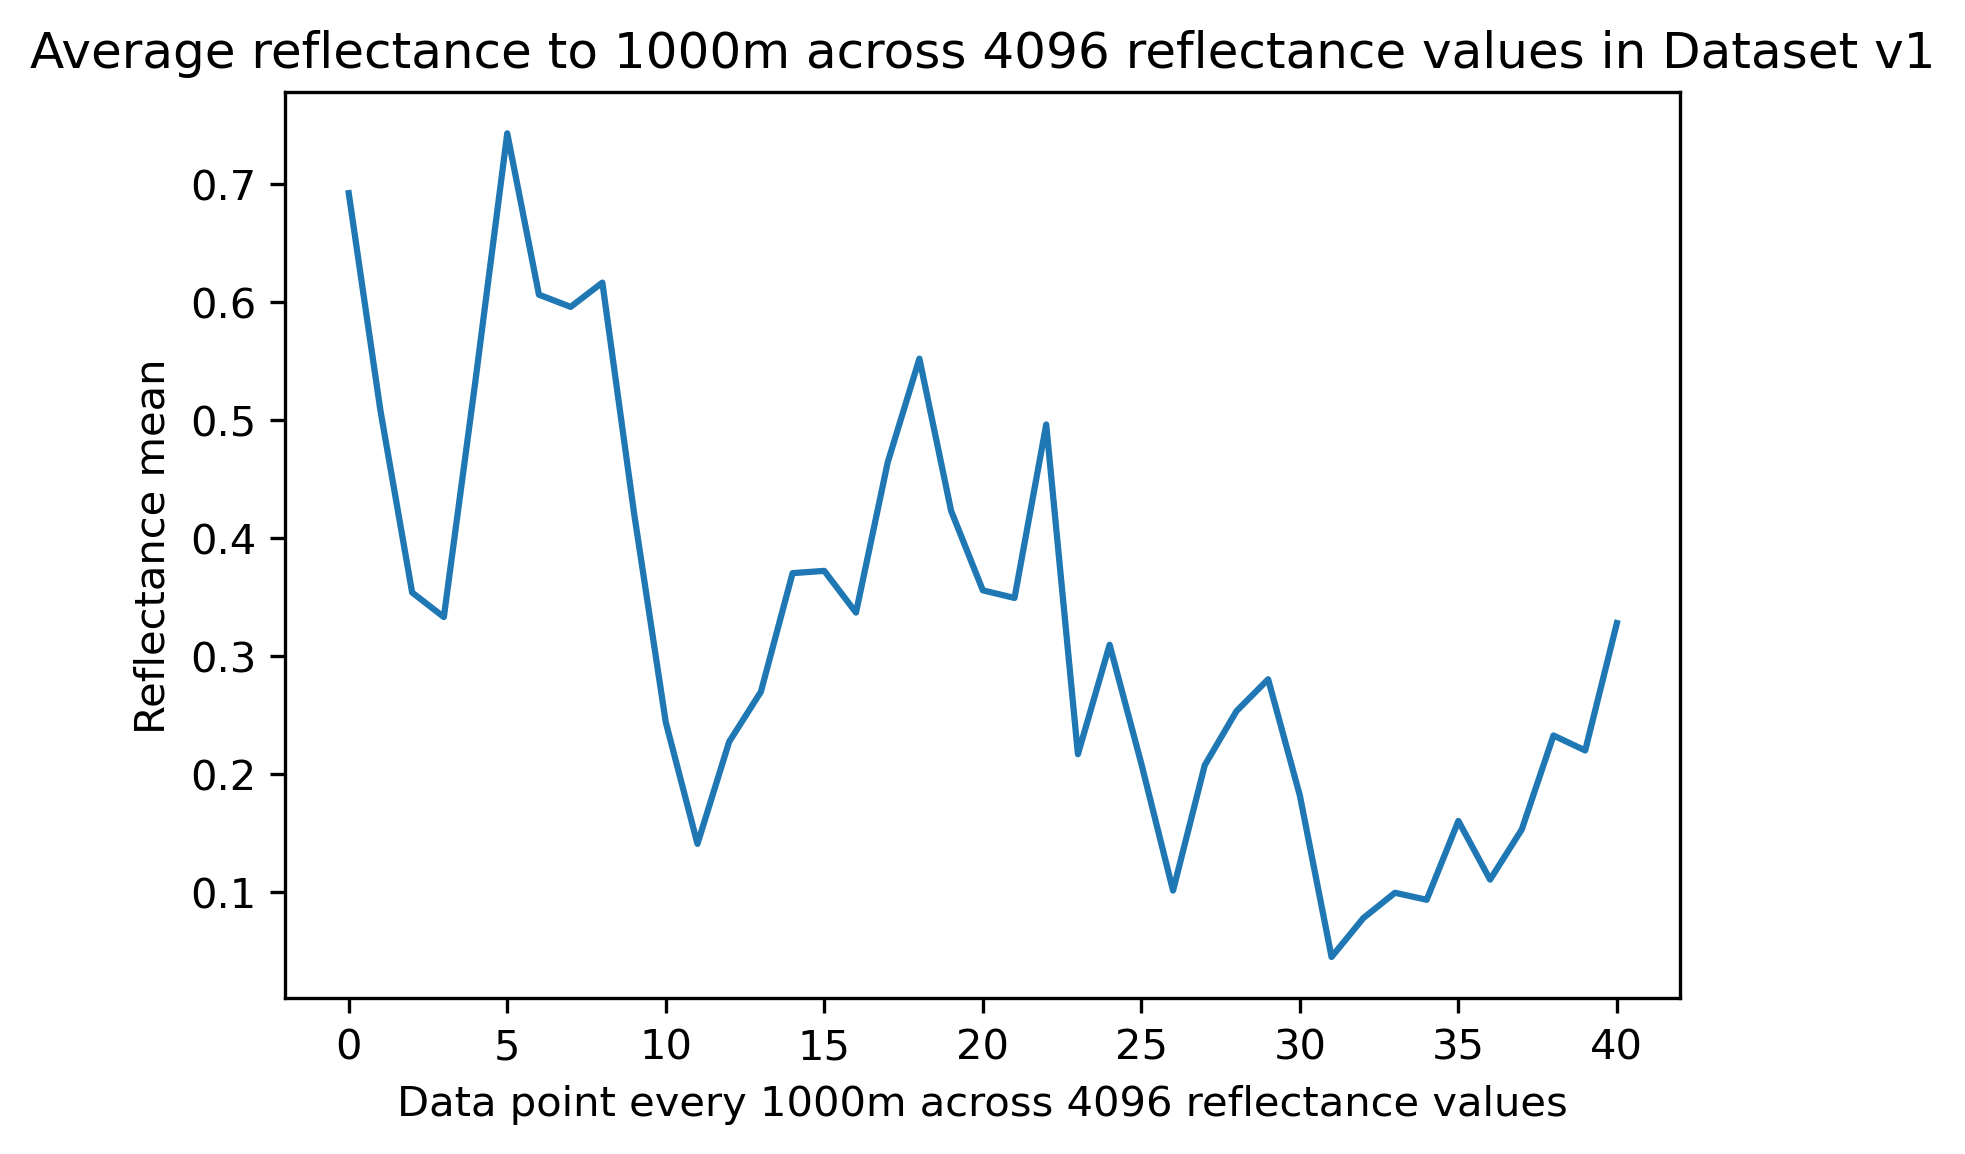

In [45]:
# plotting the profile_00002
fig,ax=plt.subplots(dpi=300)
ax.plot(range(42),r_1000m[2])
ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Data point every 1000m across 4096 reflectance values')
plt.title('Average reflectance to 1000m across 4096 reflectance values in Dataset v1')

# Data Distribution

In [6]:
import matplotlib.pyplot as plt

In [3]:

rmean=[]
cmean=[]
for i in range(4000):
    r=np.mean(r_data[i,:,:,:])#radiance
    c=np.mean(cot_data[i,:]) #COT
    rmean.append(r)
    cmean.append(c)

In [4]:
len(rmean)

4000

Text(0.5, 1.0, 'Reflectance mean across all 4000 profiles in 2021 new data version 1')

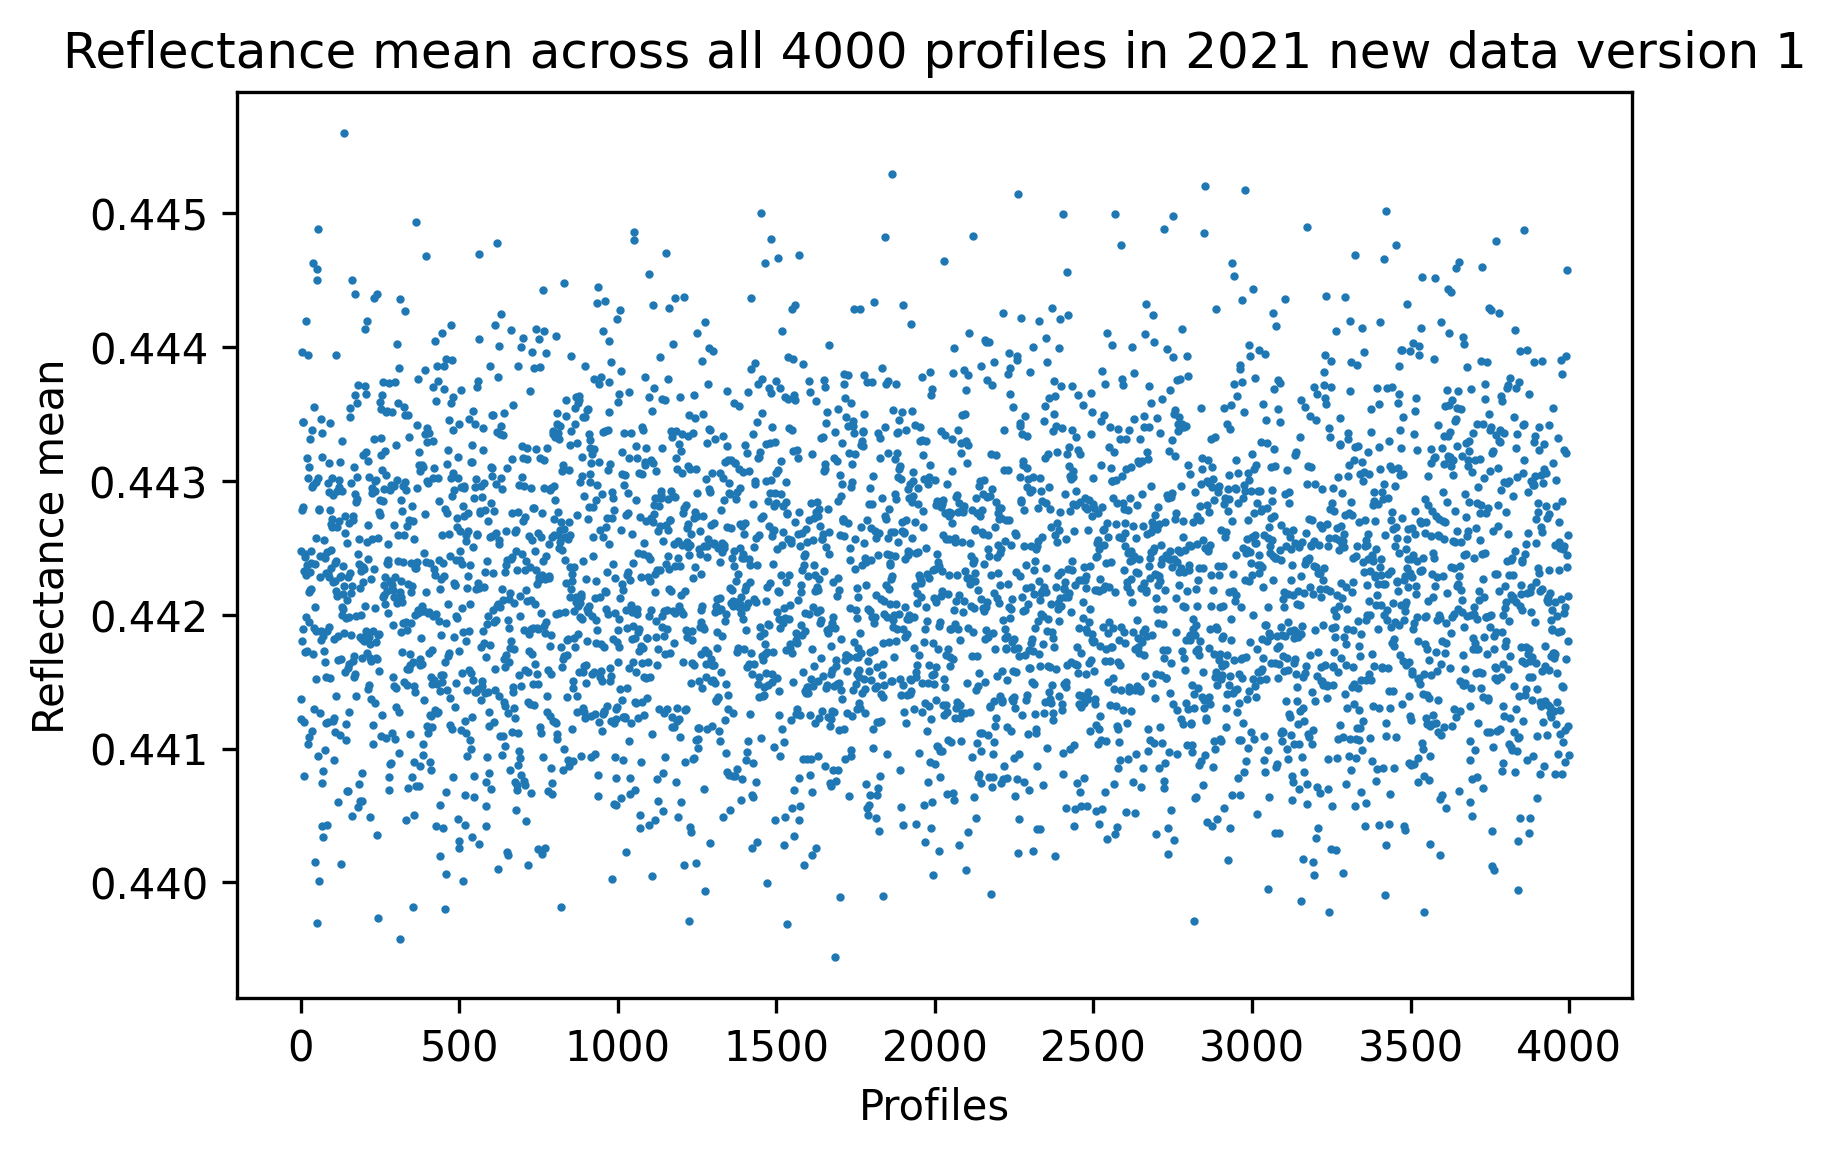

In [10]:
fig,ax=plt.subplots(dpi=300)
ax.scatter(range(4000),rmean,marker='o',s=1)
ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Profiles')
plt.title('Reflectance mean across all 4000 profiles in 2021 new data version 1')

Text(0.5, 1.0, 'Reflectance mean across the first 500 profiles in 2021 new data version 1')

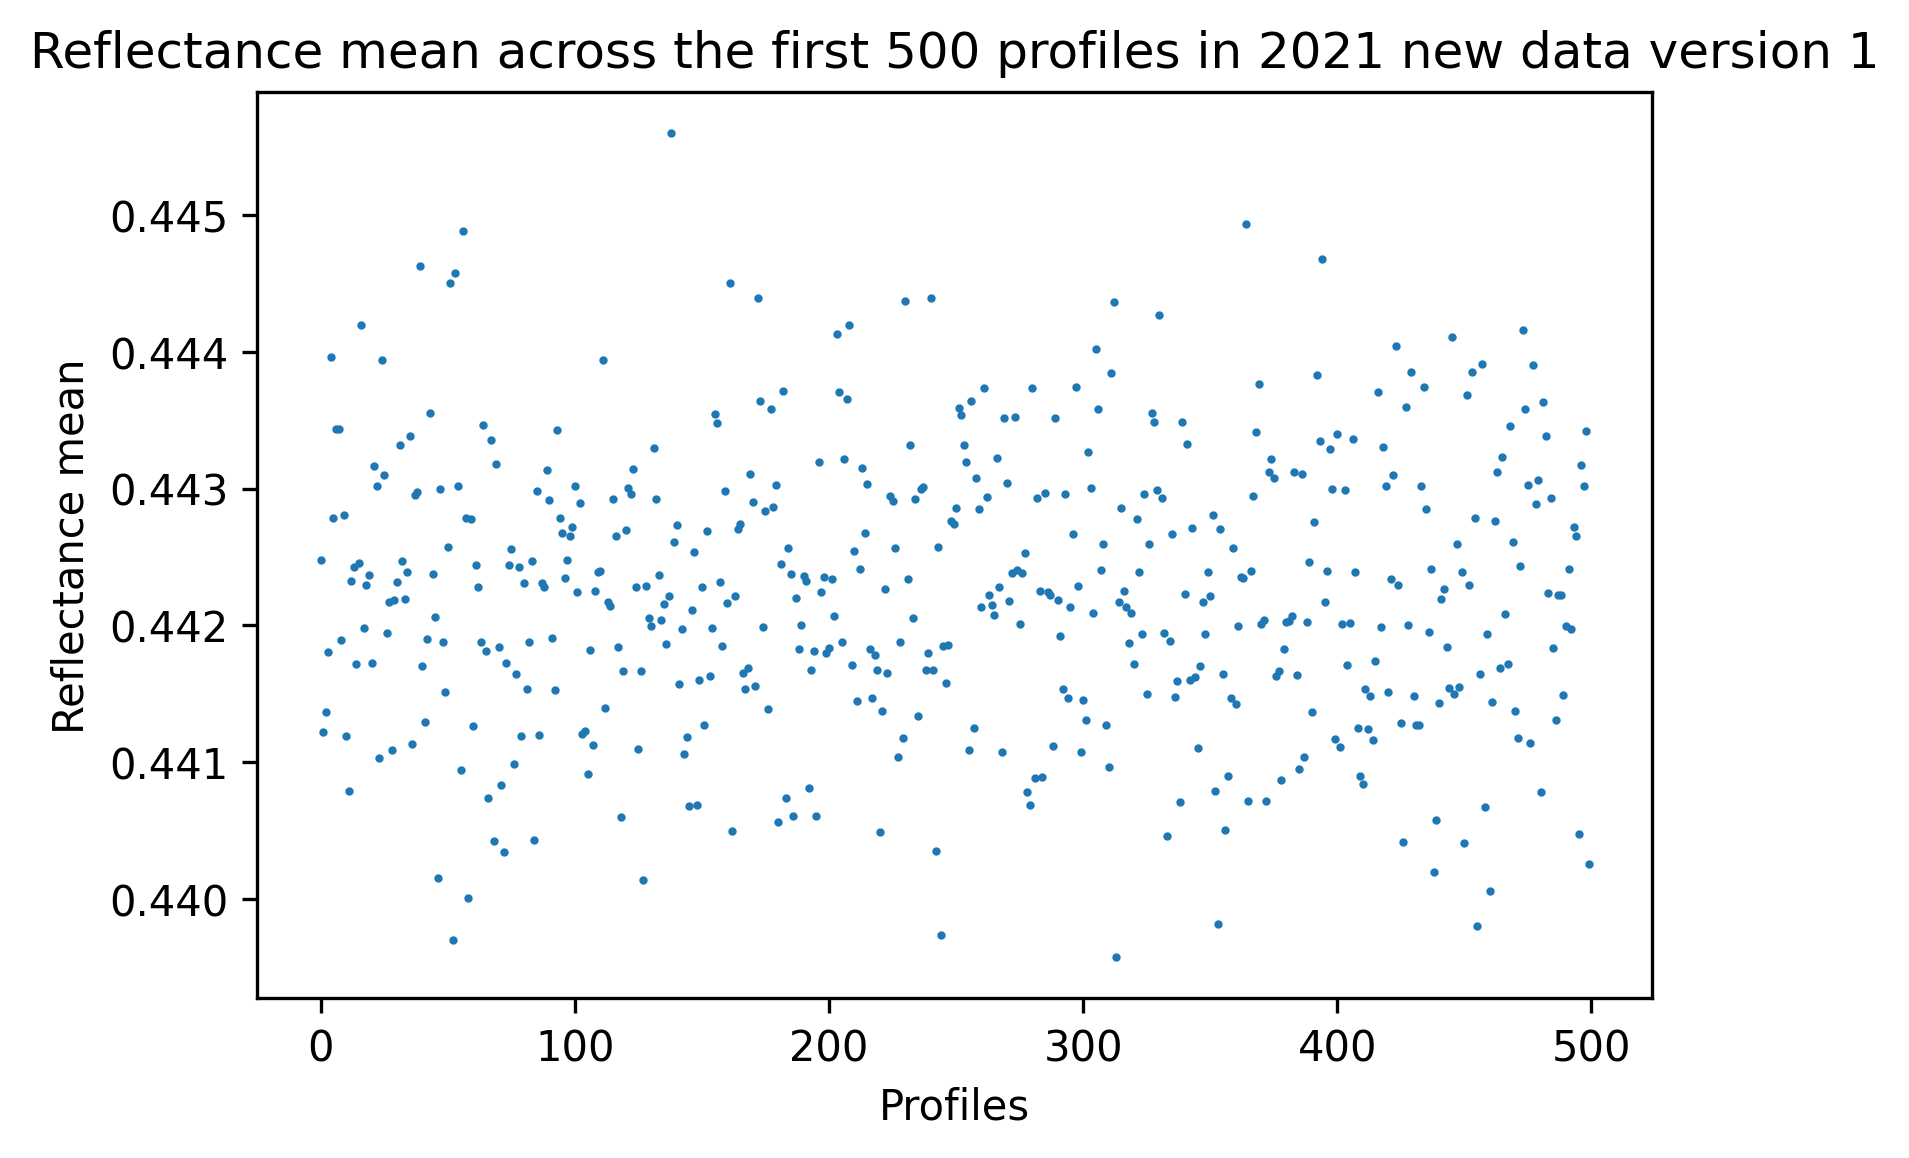

In [9]:
fig,ax=plt.subplots(dpi=300)
ax.scatter(range(500),rmean[:500],marker='o',s=1)
ax.set_ylabel('Reflectance mean')
ax.set_xlabel('Profiles')
plt.title('Reflectance mean across the first 500 profiles in 2021 new data version 1')

Text(0.5, 1.0, 'COT mean across all 4000 profiles in 2021 new data')

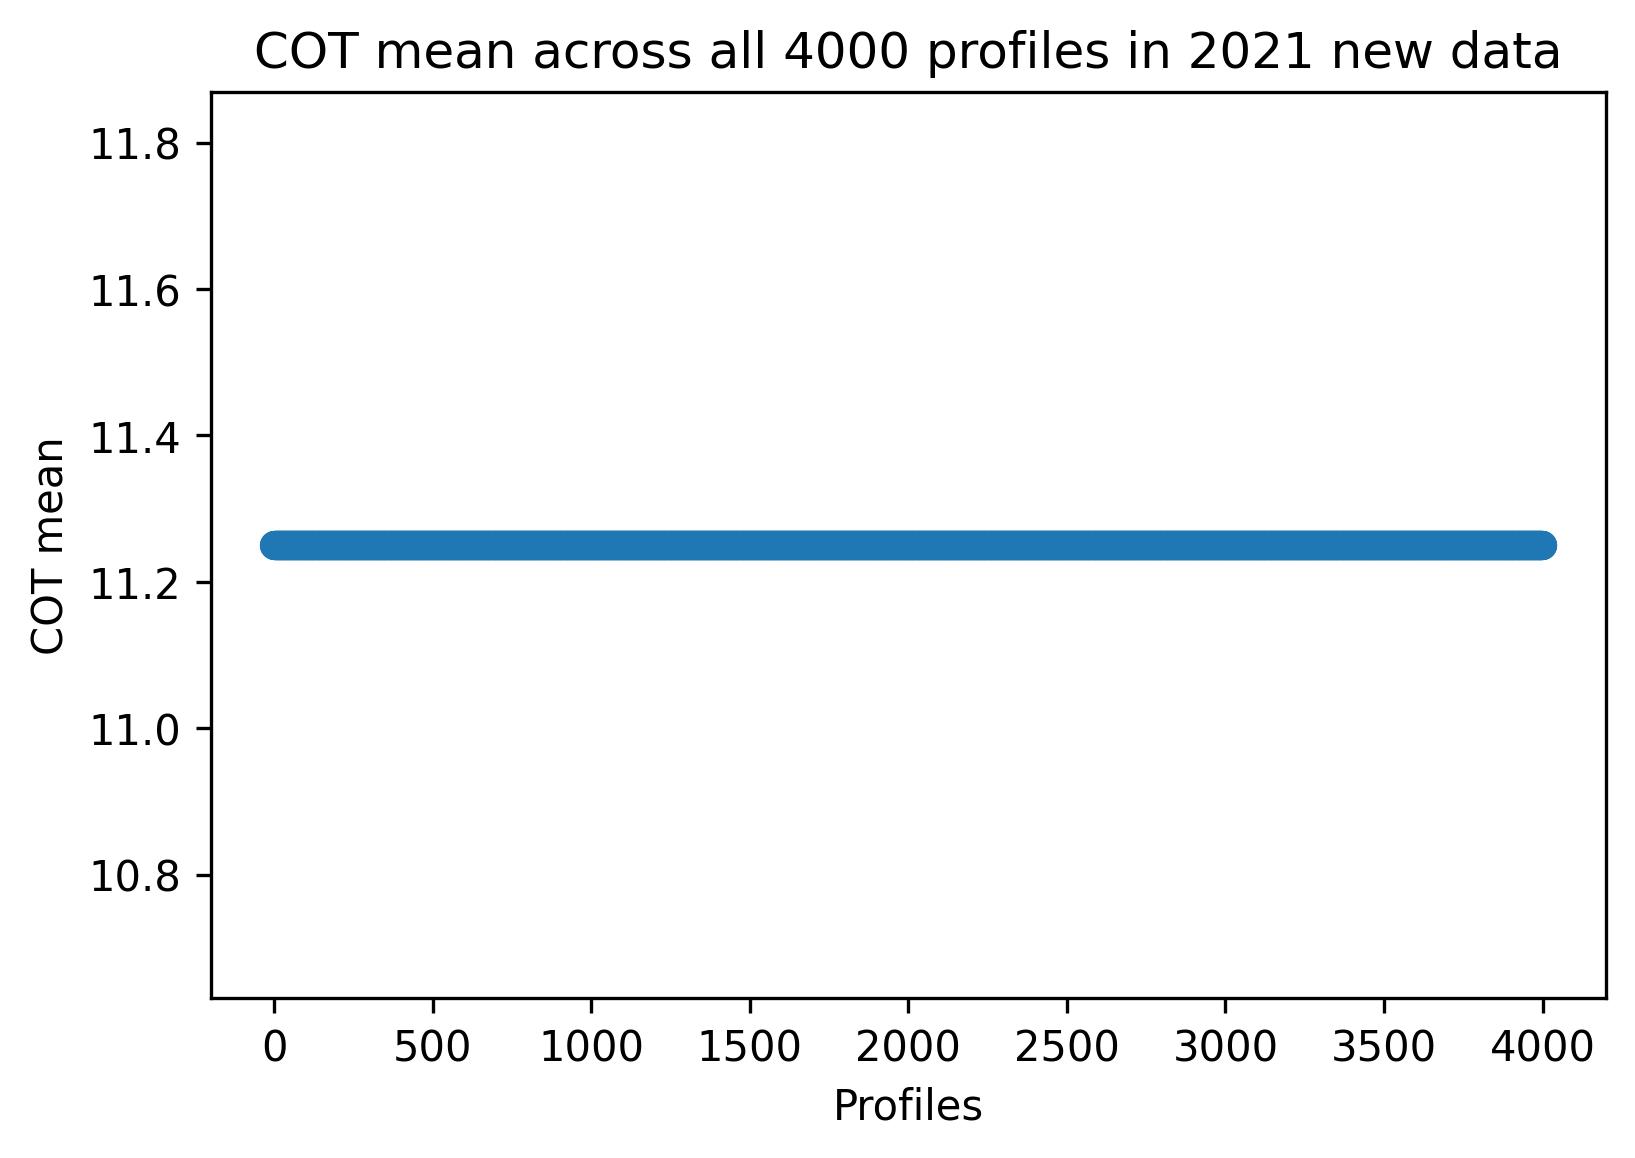

In [11]:
fig,ax=plt.subplots(dpi=300)
ax.plot(cmean,marker='o')
ax.set_ylabel('COT mean')
ax.set_xlabel('Profiles')
plt.title('COT mean across all 4000 profiles in 2021 new data')

In [16]:
len(r_data)

4000

In [17]:
len(cot_data)

4000

In [18]:
np.amax(r_data)

1.7158

In [19]:
np.amin(r_data)

0.011054

In [23]:
np.mean(r_data)

0.22137604176824036

In [20]:
np.amax(cot_data)

87.23837410583292

In [21]:
np.amin(cot_data)

0.6835138116457925

In [22]:
np.mean(cot_data)

11.25

Keys: <KeysViewHDF5 ['SAA', 'SZA', 'SfcALbedo', 'VZA', 'WVL', 'lwp', 're', 'reflectance', 'tau', 'x', 'y']>


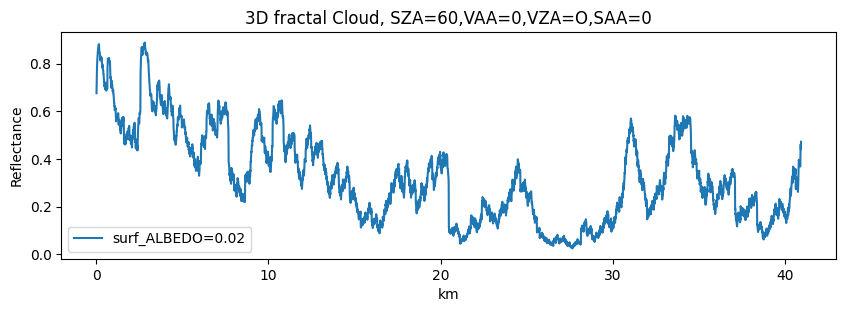

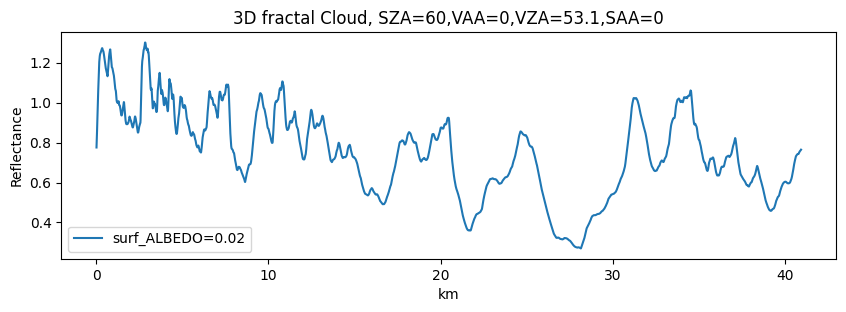

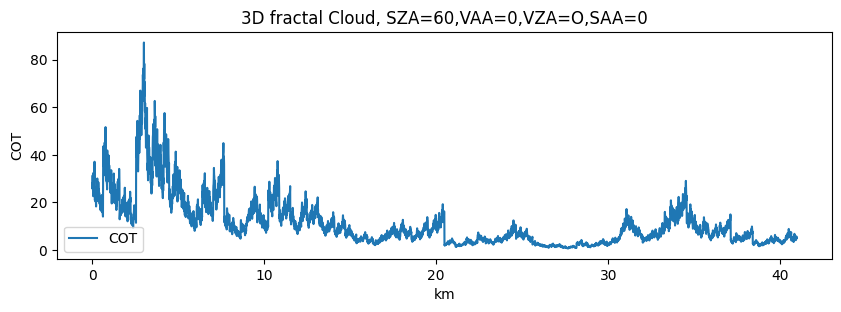

In [28]:
filename = "profiles/profile_00239.hdf5"
with h5py.File(filename, "r") as f:
    ###  List all groups   #####
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    reflectance=(f['reflectance'][:])  # reflectance
    SAA=(f['SAA'][:])   # solar Azimuth Angle
    SZA=(f['SZA'][:])
    VZA=(f['VZA'][:])
    LWP=(f['lwp'][:])
    effective_radius=(f['re'][:])   # Effective Radius
    COT=(f['tau'][:])     ## COT 
    Surface_ALbedo=(f['SfcALbedo'][:])  # Surface Albedo
    x=(f['x'][:])  # Spatial X
    
    
    

    fig1,ax1 = plt.subplots(figsize=(10,3),dpi=100)
    fig2,ax2 = plt.subplots(figsize=(10,3),dpi=100)
    fig3,ax3 = plt.subplots(figsize=(10,3),dpi=100)


    ##  to plot Reflectance ###################
    #  plot all (4096) reflectance values at  VZA=0 degrees, and SZA=60 degrees.
    ax1.plot(x,reflectance[5,5,:],label='surf_ALBEDO=0.02')  
    ax1.set_xlabel('km')
    ax1.set_ylabel('Reflectance')
    
    #  plot all (4096) reflectance values at  VZA=53.1 degrees, and SZA=60 degrees.
    ax2.plot(x,reflectance[1,5,:],label='surf_ALBEDO=0.02')  
    ax2.set_xlabel('km')
    ax2.set_ylabel('Reflectance')
    ###two plots are different 
    ax3.plot(x,COT,label='COT')  
    ax3.set_xlabel('km')
    ax3.set_ylabel('COT')
    
    
    ax3.legend(loc='lower left')
    ax3.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=O,SAA=0')


    ax1.legend(loc='lower left')
    ax1.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=O,SAA=0')
    
    ax2.legend(loc='lower left')
    ax2.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=53.1,SAA=0')

Keys: <KeysViewHDF5 ['SAA', 'SZA', 'SfcALbedo', 'VZA', 'WVL', 'lwp', 're', 'reflectance', 'tau', 'x', 'y']>


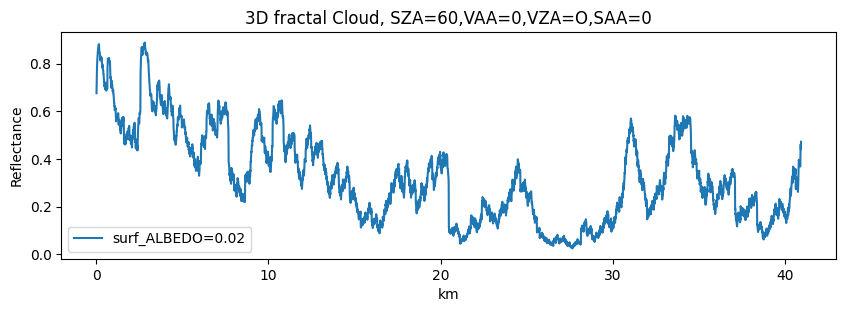

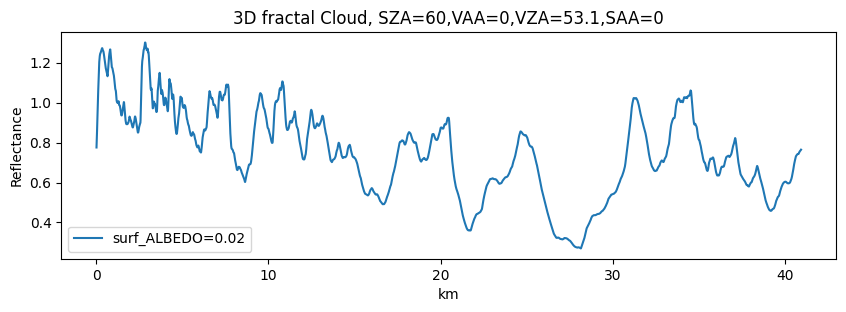

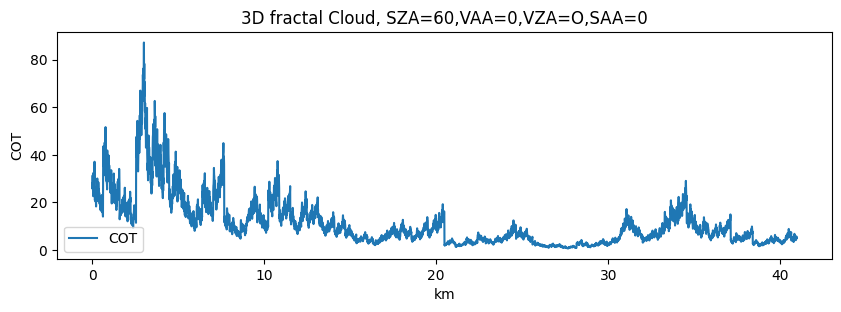

In [27]:
filename = "profile_00239.hdf5"
with h5py.File(filename, "r") as f:
    ###  List all groups   #####
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]
    
    reflectance=(f['reflectance'][:])  # reflectance
    SAA=(f['SAA'][:])   # solar Azimuth Angle
    SZA=(f['SZA'][:])
    VZA=(f['VZA'][:])
    LWP=(f['lwp'][:])
    effective_radius=(f['re'][:])   # Effective Radius
    COT=(f['tau'][:])     ## COT 
    Surface_ALbedo=(f['SfcALbedo'][:])  # Surface Albedo
    x=(f['x'][:])  # Spatial X
    
    
    

    fig1,ax1 = plt.subplots(figsize=(10,3),dpi=100)
    fig2,ax2 = plt.subplots(figsize=(10,3),dpi=100)
    fig3,ax3 = plt.subplots(figsize=(10,3),dpi=100)


    ##  to plot Reflectance ###################
    #  plot all (4096) reflectance values at  VZA=0 degrees, and SZA=60 degrees.
    ax1.plot(x,reflectance[5,5,:],label='surf_ALBEDO=0.02')  
    ax1.set_xlabel('km')
    ax1.set_ylabel('Reflectance')
    
    #  plot all (4096) reflectance values at  VZA=53.1 degrees, and SZA=60 degrees.
    ax2.plot(x,reflectance[1,5,:],label='surf_ALBEDO=0.02')  
    ax2.set_xlabel('km')
    ax2.set_ylabel('Reflectance')
    ###two plots are different 
    ax3.plot(x,COT,label='COT')  
    ax3.set_xlabel('km')
    ax3.set_ylabel('COT')
    
    
    ax3.legend(loc='lower left')
    ax3.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=O,SAA=0')


    ax1.legend(loc='lower left')
    ax1.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=O,SAA=0')
    
    ax2.legend(loc='lower left')
    ax2.set_title('3D fractal Cloud, SZA=60,VAA=0,VZA=53.1,SAA=0')